<a href="https://colab.research.google.com/github/cisco00/Admission-Prediction-Model/blob/dev/Admission_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression model to predict the chance a student have in other to be admitted after written a GRE or TOEFL  

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reading the dataset into the notebook using pandas library

In [84]:
Admission_Predict = pd.read_csv("/content/Admission_Predict.csv")
Admission_Predict.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [85]:
Admission_Predict_ = Admission_Predict.rename(columns={'Chance of Admit ': 'ChanceAdmit', 'GRE Score':'GREScore', 'TOEFL Score':'TOEFLScore', 'University Rating':'UniversityRating'})

**Checking for missing data**

In [86]:
Admission_Predict_.isna().sum()

Serial No.          0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceAdmit         0
dtype: int64

**Data types**

In [87]:
Admission_Predict_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceAdmit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Dropping features that are not necessary for performing regression**

In [88]:
Admission_Predict_1 = Admission_Predict_.drop(columns=['Serial No.'], axis=1)
Admission_Predict_1

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


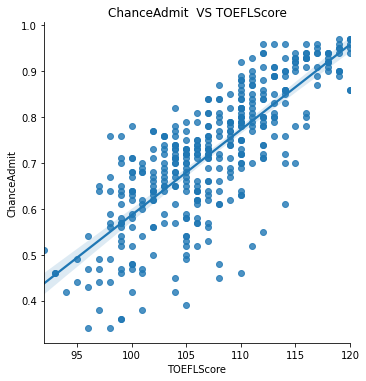

In [89]:
fig=sns.lmplot(x='TOEFLScore',y='ChanceAdmit',data=Admission_Predict_1)
plt.title("ChanceAdmit  VS TOEFLScore")
plt.show()

The graph above shows that people that score high in TOEFL exams tends to stand better chance of getting admitted into the university of high rating compare to others

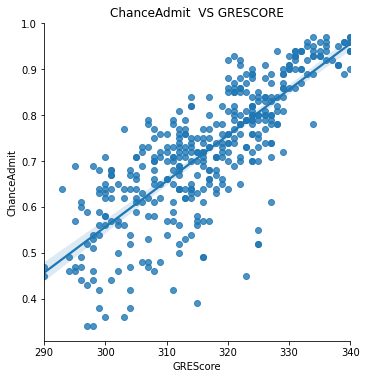

In [90]:
fig=sns.lmplot(x='GREScore',y='ChanceAdmit',data=Admission_Predict_1) 
plt.title("ChanceAdmit  VS GRESCORE")
plt.show()

The graph above shows that people that score high in GRE exams tends to stand better chance of getting admitted into the university of high rating compare to others

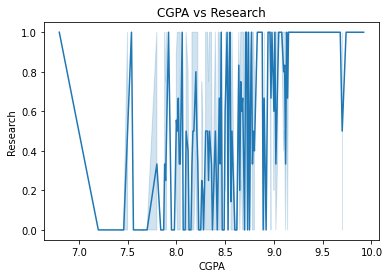

In [91]:
fig=sns.lineplot(x='CGPA',y='Research',data=Admission_Predict_1)
plt.title("CGPA vs Research")
plt.show()

The graph above shows that people with high CGPA tends to carryout more resarch compare to their conterpart

**Checking for the correlation between variables**

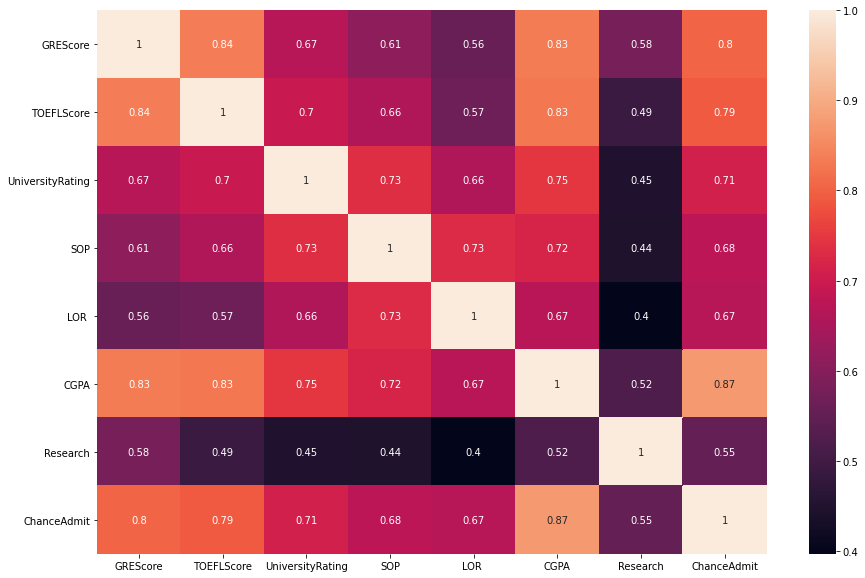

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(Admission_Predict_1.corr(), annot=True)

From the heatmap we can tell that the relationship between chances of admitted into university depending on either your TOEFL score or your GRE score the higher the score the better the chance of you getting admission

In [93]:
Admission_Predict_1.describe()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The describe show that there are no outliers between the scores in the exam

Splitting dataset into x and y variables where the x=independent and y=dependent variable

In [94]:
y = Admission_Predict_1['ChanceAdmit']
x = Admission_Predict_1.drop(columns=['ChanceAdmit'], axis=1)

**converting the dependent variable from series to a numpy array and reshaping it from 1D array to a 2D array**

In [95]:
y_1 = y.to_numpy().reshape((-1, 1))

**splitting dataset into train and test**

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y_1, test_size=.20, random_state=45 )

**fitting the models**

In [97]:
model = LinearRegression()
admin_chance = model.fit(X_train, y_train)

**Getting my r_square(Coefficient of determination)**

In [98]:
coef_deter = admin_chance.score(X_train, y_train)
coef_deter

0.8025359599838279

From the score it goes to say the model has 80% of telling if a student has the chance of getting admission into the university or not.

**Adjusted r_square**

In [99]:
1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.7981056770347471

This shows that even with addition of more variable to the model, the model will have 79.8% ~ 80% of predicting the variables

In [100]:
intercept = model.coef_
intercept

array([[ 0.00215273,  0.00217638,  0.00522328, -0.00127586,  0.01996118,
         0.12148871,  0.02298341]])

The Coefficient above shows that there is a positive relationship between the independent variables and the dependent variable aside from SOP which has a negative relationship with the dependent variable. Which goes to say even with high SOP there is no chance of getting admitted into the university. 

In [101]:
y_predict = admin_chance.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.044405536774571985
MSE :  0.003321683663424673
R2 score :  0.8049825387312869


**Statement Hypothesis**

H1: There is a high chance of getting admitted into a university of high rating when you have high scores in GRE and TOEFL exams respectively.

H0: There is no high chance of getting admitted into a university of high rating when you have high scores in GRE and TOEFL exams respectively.

In [103]:
import statsmodels.formula.api as smf

In [104]:
feature_cols = ['GREScore', 'TOEFLScore', 'CGPA', 'Research', 'UniversityRating']
X = Admission_Predict_1[feature_cols]
y = Admission_Predict_1.ChanceAdmit

In [105]:
admin_chance_lm = smf.ols(formula='ChanceAdmit ~ GREScore + TOEFLScore + CGPA + Research + UniversityRating', data=Admission_Predict_).fit()
admin_chance_lm.conf_int()
admin_chance_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ChanceAdmit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):          5.23e-133
Time:                        11:28:04   Log-Likelihood:                 528.63
No. Observations:                 400   AIC:                            -1045.
Df Residuals:                     394   BIC:                            -1021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2784      0.127    -10.088      0.000      -1.528      -1.029
GREScore             0.0016      0.001      2.715      0.007       0.000       0.003
TOEFLScore           0.0028      0.001      2.500      0.013       0.001       0.005
CGPA                 0.1322      0.012     11.185      0.000       0.109       0.155
Research             0.0261      0.008      3.234      0.001       0.010       0.042
UniversityRating     0.0109      0.004      2.486      0.013       0.002       0.020
==============================================================================
Omnibus:                       87.670   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.050
Skew:                          -1.179   Prob(JB):                     2.65e-38
Kurtosis:                       5.196   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary Statistics**

The Log Likelihood value is a measure of goodness of fit for any model. And since it is high it goes to say the model has high predictive capabilities of telling if a student with high scores in any of the exams can perform better when he/she get admitted.

Durbin-Watson: The Durbin Watson statistic is a test for autocorrelation in a data set. A value of 2.0 means there is no autocorrelation detected in the sample. Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation. From our summary statistic it goes to show that variables being used for the correlation all has positive relationship with the dependent variable.

Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. From the summary statistics the Jargue_Bera test shows that our dataset are normally distributed.

P-Value:This shows the level of significance of the the variables and with low P-value of less than 0.05 it goes to show that the variables used in the regression equation are all significant.

**Conclusion**

With high R-squared of 79.5% ~ 80% it goes to say that our model has 80% of telling if a student has the chance of getting admission into the university or not. Sometimes the R-squared might be decieving so to get a better model with no overfitting there is the need to check your adjusted R-Squared shows that even with addition of more variable to the model, the model will have 79% of predicting the response.

Finally with p-value less than 0.05 we accept the alternative(H1) which say there here is a high chance of getting admitted into a university of high rating when you have high scores in GRE and TOEFL exams respectively and reject the Null(H0) hypothesis.  